<a href="https://colab.research.google.com/github/AndrewstheBuilder/DeepLearning/blob/main/TitanicKaggleChallenge_Blog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

I did a Kaggle Challenge and this is my work related to that. Everything above is my imports and connecting to my Google Drive for use in Google Colaboratory. Here is the Kaggle Challenge Link: https://www.kaggle.com/competitions/titanic/overview

## Step 1: **Explore the dataset and do data analysis**.
Used https://www.kaggle.com/code/startupsci/titanic-data-science-solutions for data analysis inspiration

In [3]:
# Read in data and see a preview of it using .head()
data = pd.read_csv('./drive/MyDrive/Titanic_Challenge/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Convert categorical datatypes 'Sex' and 'Embarked' into numeric
  # to do correlation calculation
numeric_df = data.select_dtypes(include=[float, int])
numeric_df['Sex'] = data['Sex'].map({'male': 0, 'female':1})
numeric_df['Embarked'] = data['Embarked'].map({'S':0, 'C':1, 'Q':2})

# numeric_df.head()
numeric_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.042939,-0.030555
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.543351,0.108669
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.131900,0.043835
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.093254,0.012186
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.114631,-0.060606
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.245489,-0.079320
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.182333,0.063462
Sex,-0.042939,0.543351,-0.131900,-0.093254,0.114631,0.245489,0.182333,1.000000,0.118593
Embarked,-0.030555,0.108669,0.043835,0.012186,-0.060606,-0.079320,0.063462,0.118593,1.000000


**Gain an intuition** for how the correlation calculation works by using a tiny example. **What I found**: the best correlations have graphs that depict a monotonic relationship like the sigmoid function and not snake curves like the piece wise function (graphed below)

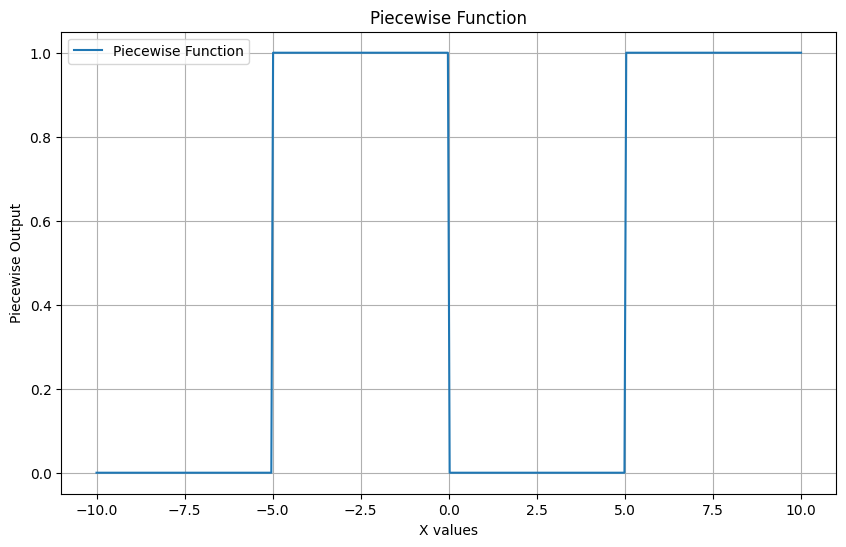

Correlation coefficient: 0.43301405506325596


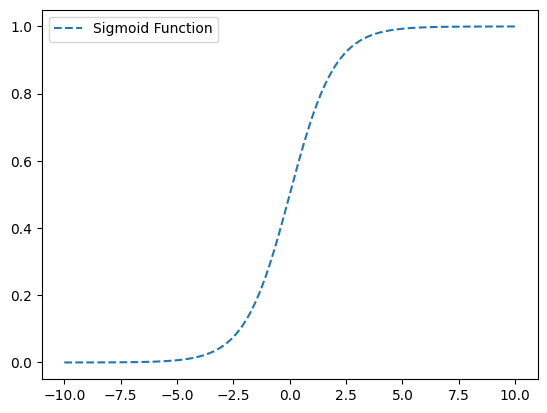

Sigmoid Correlation coefficient: 0.9362677445388511


In [5]:
# Prove to myself that outputs going up and down will give a bad correlation
# Correlation only captures monotonic relationships
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def piecewise(x):
    if x < -5:
        return 0
    elif -5 <= x < 0:
        return 1
    elif 0 <= x < 5:
        return 0
    else:
        return 1

# Generate x values
x = np.linspace(-10, 10, 400)  # 400 points from -10 to 10

# Apply the piecewise function to each x value
y = np.array([piecewise(xi) for xi in x])

# Plotting the Sigmoid function
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Piecewise Function')
plt.title('Piecewise Function')
plt.xlabel('X values')
plt.ylabel('Piecewise Output')
plt.grid(True)
plt.legend()
plt.show()

# Create a DataFrame
data_piecewise = pd.DataFrame({'X': x, 'Y': y})

# Calculate correlation
correlation = data_piecewise['X'].corr(data_piecewise['Y'])
print("Correlation coefficient:", correlation)

# Monotonic function - Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Apply the sigmoid function to each x value
y_sigmoid = np.array([sigmoid(xi) for xi in x])

# Plotting the Sigmoid function on the same plot
plt.plot(x, y_sigmoid, label='Sigmoid Function', linestyle='--')
plt.legend()
plt.show()

# Create a DataFrame for the sigmoid function
data_sigmoid = pd.DataFrame({'X': x, 'Y_Sigmoid': y_sigmoid})

# Calculate correlation for sigmoid
correlation_sigmoid = data_sigmoid['X'].corr(data_sigmoid['Y_Sigmoid'])
print("Sigmoid Correlation coefficient:", correlation_sigmoid)

Below plot shows why pandas.corr() may not be the most reliable metric for showing which features(Age, Embarked,etc) are the most important to deciding whether a passenger lived or died. **The data is up and down**: As age goes up there is no clear rise or fall in deaths its behaving more like the piece wise function and not like the sigmoid function above.

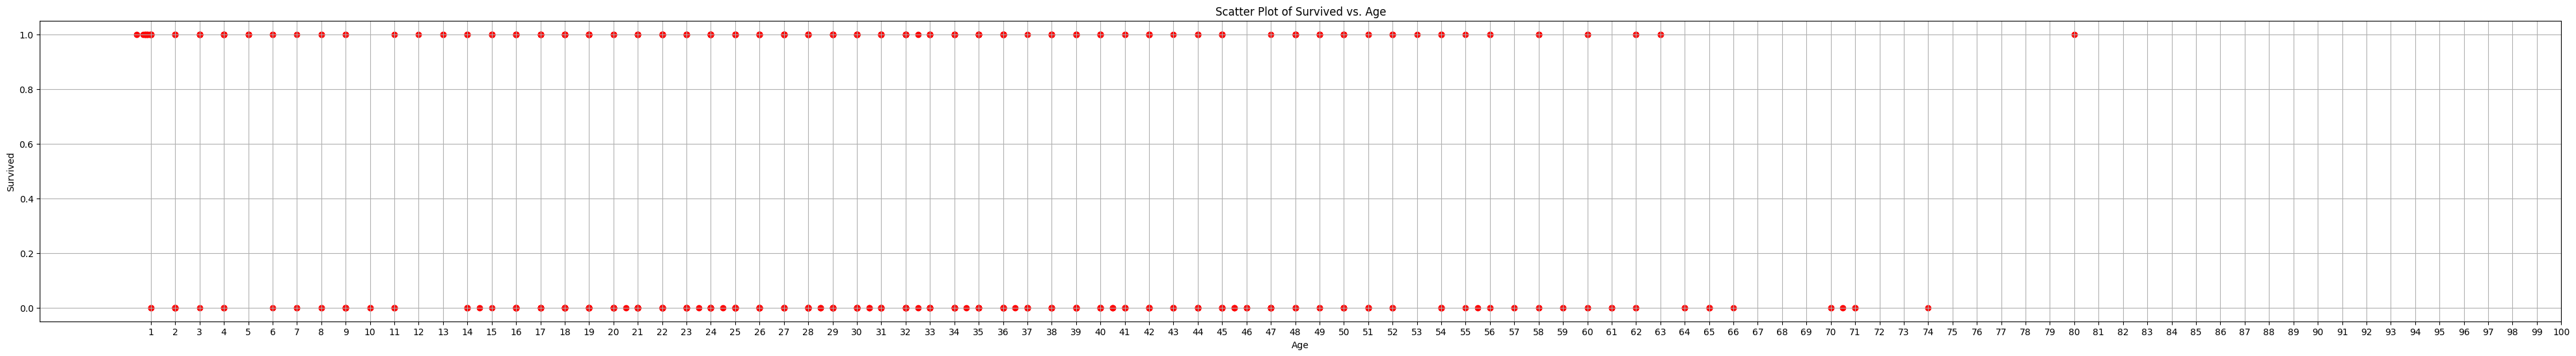

In [6]:
# Completely useless plot
# But it shows why the correlation calculation would not work.
# The data is up and down like the piece wise function above
plt.figure(figsize=(50,6))
plt.scatter(data['Age'], data['Survived'], alpha=1, color='red')
plt.title("Scatter Plot of Survived vs. Age")
plt.xlabel('Age')
plt.ylabel('Survived')
plt.xticks(range(1, 101, 1))
plt.grid(True)
plt.show()

In [7]:
# Determine Age bands and check correlation with Survived
# print(pd.cut(data['Age'],5))
# print(data['Age'].head())
data['AgeBand'] = pd.cut(data['Age'], 5)
data[['AgeBand','Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.369942
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


These are the graphs that I mainly relied on for my analysis because it shows the correlation between deaths and the other classes well. "Oh look the lower class people tended to not be survivors"

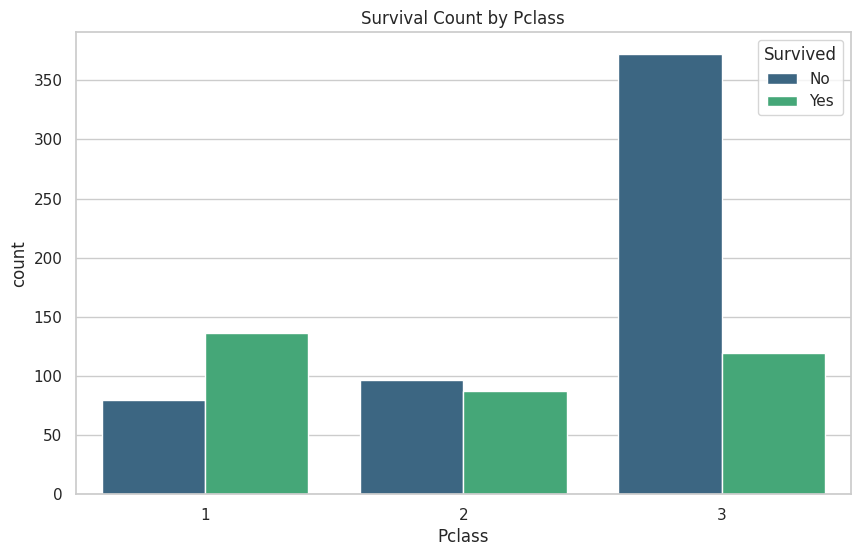

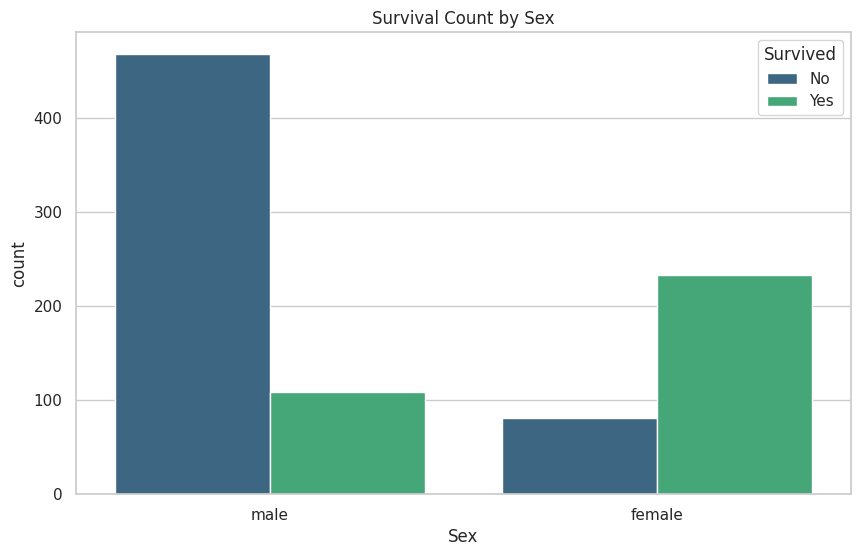

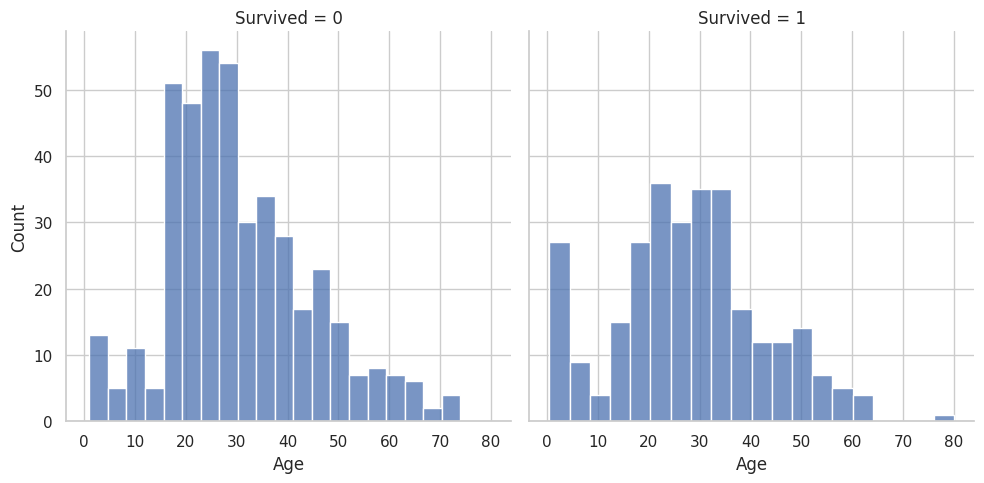

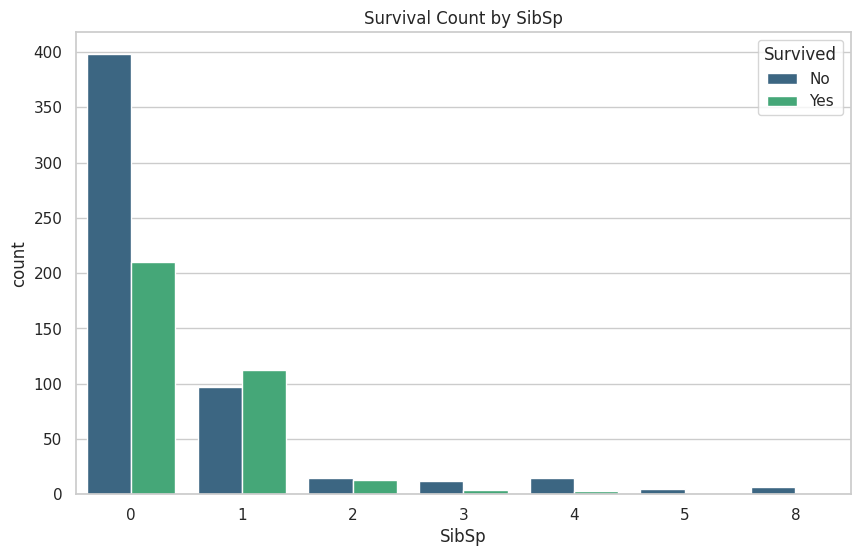

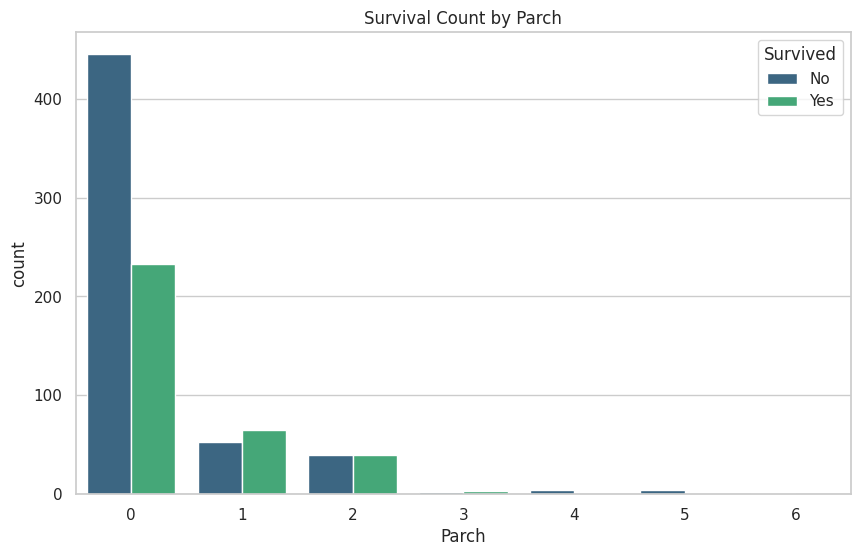

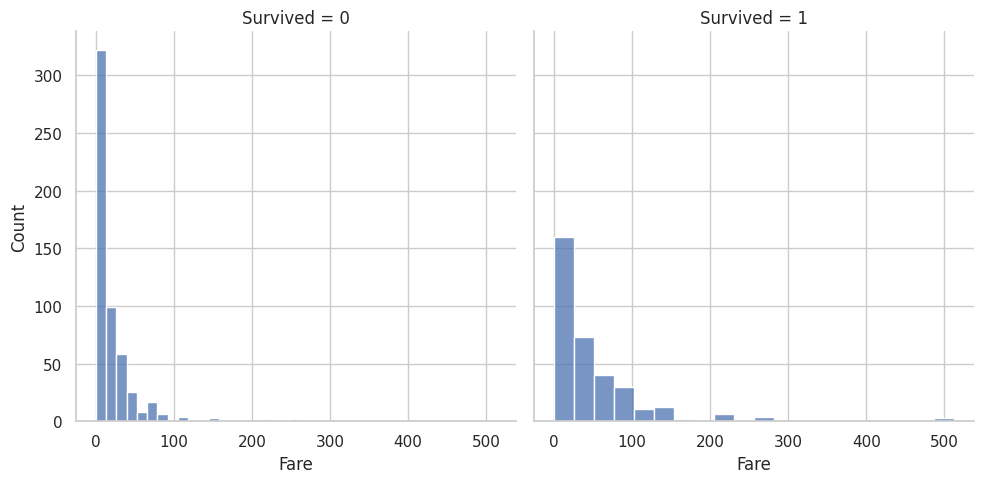

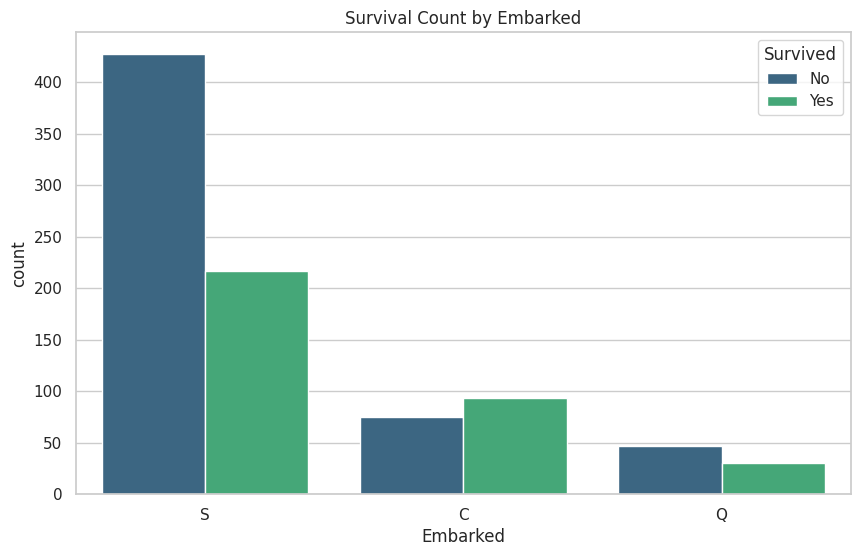

In [8]:
# These graphs are gold!
# Load and analyze the data
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Columns to plot, excluding 'PassengerId', 'Name', 'Ticket', 'Cabin' due to their specificity or lack of relevance
columns_to_plot = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

# Define a function to plot survival count based on a given feature
def plot_survival(data, column):
    if column=='Age' or column=='Fare':
        g = sns.FacetGrid(data, col='Survived', height=5, aspect=1)
        g.map(sns.histplot, column, bins=20, kde=False)
    else:
        # Create a count plot for categorical data
        plt.figure(figsize=(10, 6))
        sns.countplot(x=column, hue='Survived', data=data, palette='viridis')
        plt.title(f'Survival Count by {column}')
        plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
        plt.show()

# Create a loop to generate plots for each relevant column
for column in columns_to_plot:
    plot_survival(data, column)

In [9]:
# Read in training and test dataset
# Previous analysis above was also on training dataset it just had a different variable name
# Now calling training dataset train_df
train_df = pd.read_csv('./drive/MyDrive/Titanic_Challenge/train.csv')
test_df = pd.read_csv('./drive/MyDrive/Titanic_Challenge/test.csv')

In [10]:
# Get info on the train vs. test datasets
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [11]:
# Get statistics on the numerical categories in the dataset like Age and PClass(1,2,3)
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
# Describe categorical data
# the include=['O'] means to include types that are objects
train_df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


Mean statistics of each class. Mean Calculation is:
**total of survived(survived = 1) / total(survived=0 + survived=1)**

In [13]:
# P class vs Survived Mean Stat
# Mean stat is where we get the mean of the values for each category in PClass that survived
# This gives the mean of each PClass that survived.
# Look at Class 3!!!
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [14]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)
# Females were more likely to survive than males

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [15]:
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)
# The station people left from might be correlated with their PClass

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [16]:
# Number of Parents+Children => Parch
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Parch', ascending=True)

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [17]:
# Sibsp => Number of siblings + Spouse
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='SibSp', ascending=True)

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


#### I wondered if the amount of SibSp or Parch is correlated with PClass, but I did not find anything compelling there

In [18]:
train_df[['SibSp', 'Pclass']].groupby(['SibSp', 'Pclass'], as_index=False).value_counts()

,SibSp,Pclass,count
0,0,1,137
1,0,2,120
2,0,3,351
3,1,1,71
4,1,2,55
5,1,3,83
6,2,1,5
7,2,2,8
8,2,3,15
9,3,1,3


In [19]:
train_df[['Parch', 'Pclass']].groupby(['Parch', 'Pclass'], as_index=False).value_counts()

,Parch,Pclass,count
0,0,1,163
1,0,2,134
2,0,3,381
3,1,1,31
4,1,2,32
5,1,3,55
6,2,1,21
7,2,2,16
8,2,3,43
9,3,2,2


#### Clearer view graphs. To get a clearer view of who survived vs. who did not for specific classes we are interested in

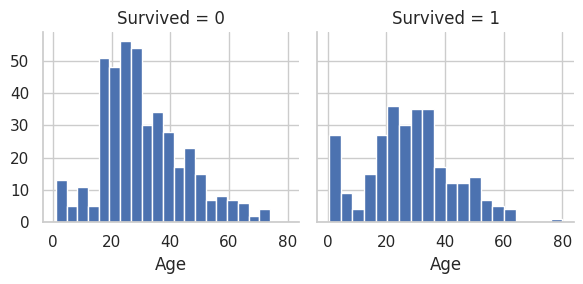

In [20]:
# Get a clear view of Age range and who did not survive (0) vs. who survived (1)
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

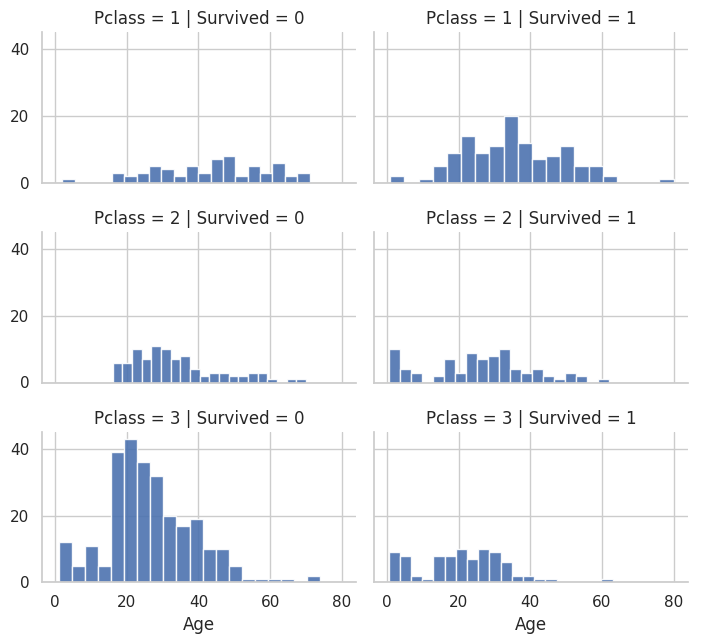

In [21]:
# Age range and P Class for who did not survive(0) vs. who survived(1)
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=0.9, bins=20)
grid.add_legend();

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


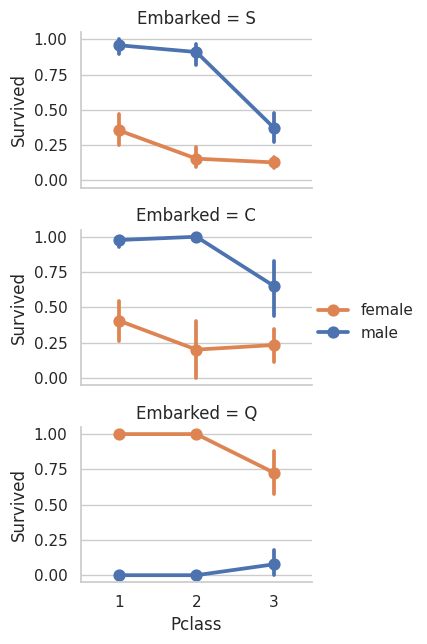

In [22]:
# Station embarked, male/female, and P Class for who did not survive vs who survived
# As you can see the male survival rate is higher for the first two stations
# But then there is a higer survival rate
# The survival rate always drops off for lower PClass
  # (Except in station C for female PClass 3)
grid = sns.FacetGrid(train_df, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


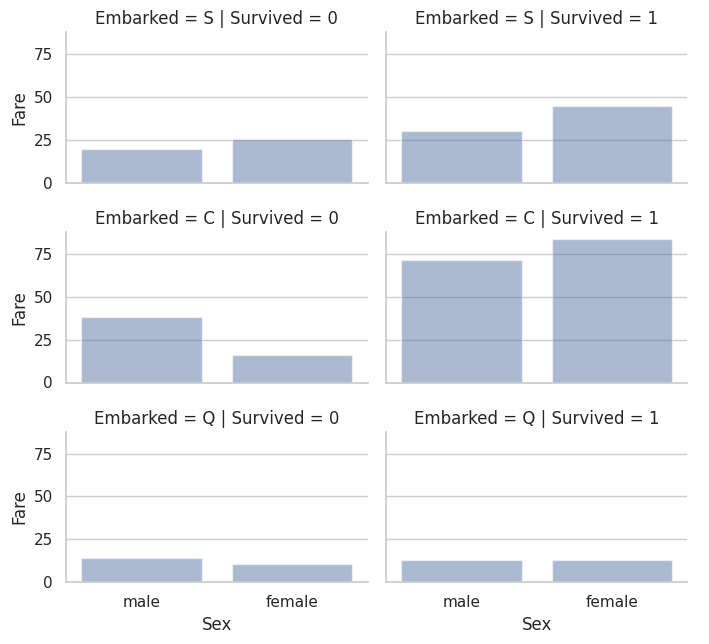

In [23]:
# Different embarked stations and male vs. female at those stations
  # Survived vs did not survive
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, errorbar=None)
grid.add_legend()

#### Transform the data to be fed into Machine Learning Algorithms
- by dropping features that will not have correlation to survival. Like ticket number and cabin
- And transforming categorical features like embarked station to numerical feature because the ML algorithms do not understand categorical features.
- Also creating new features out of the existing features that may be helpful. Like extracting titles from names.
- Filling in null values since some ML classifiers cannot handle null.

In [24]:
# Correcting by dropping features
# Drop ticket and cabin number features
combine = [train_df, test_df]
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

The blog I am following talks about creating a new feature out of the name feature called titles. Because it may have some correlation to who survived and who did not.

In [25]:
# Create title feature
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [26]:
# Mean statistic on survival with new title feature
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values('Survived')

,Title,Survived
2,Mr,0.156673
4,Rare,0.347826
0,Master,0.575000
1,Miss,0.702703
3,Mrs,0.793651


In [27]:
# Transfer the rarer titles to a overall Rare category
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

# See transformed dataset
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [28]:
# Drop name and PassengerId features for test and training datasets
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [29]:
# Convert categorical sex feature (male, female) to numeric feature
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


891
177


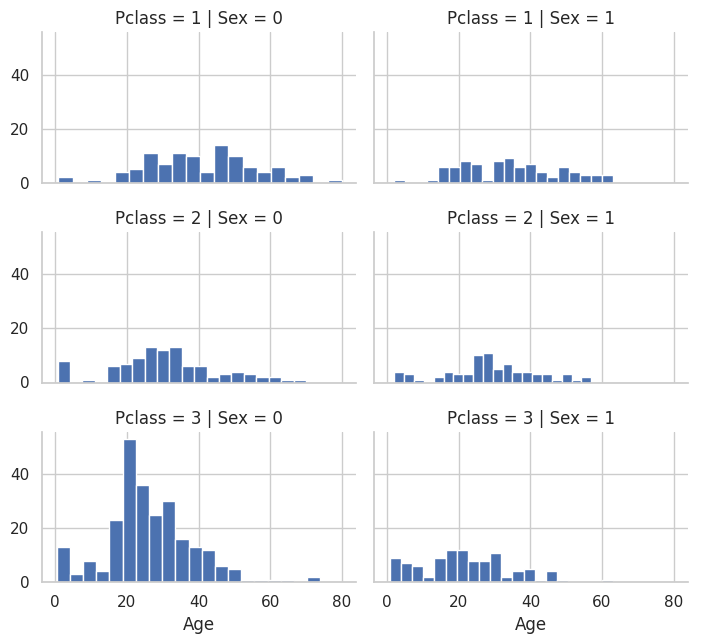

In [30]:
# Completing values for missing or null values
# For which columns?
# Age
print(len(train_df['Age']))
train_df['Age'].unique()
print(train_df['Age'].isna().sum())
# More accurate way of guessing missing values is to use other correlated features.
#  In our case we note correlation among Age, Gender, and Pclass.
#  Guess Age values using median values for Age across sets of Pclass and Gender feature combinations.
#  So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on..
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=1, bins=20)
grid.add_legend()

In [31]:
# Guessed values of Age for different combinations of Pclass and Sex
# Fill in the guessed age values where age is null

guess_ages = np.zeros((2,3))
# Iterate over Sex (0,1) and Pclass(1,2,3) to calculate guessed values of Age for the six combinations
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5

    # Fill in the guessed age values where age is null in the dataset
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [32]:
# Create Age Bands and determine correlations with Survived
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [33]:
# Replace age with ordinals for these bands
for dataset in combine:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [34]:
# Remove the age band feature
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [35]:
# Create a new feature called 'FamilySize' which combines Parch and SibSp.
# This will enable us to drop Parch and SibSp from the datasets
for dataset in combine:
    # We are adding 1 to count ourselves as a person
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [36]:
# Calculate statistics for people that survived who were alone
# Vs. ones that had family
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [37]:
# Find the most frequently occurring port
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [38]:
# Fill missing port values with the most frequent occurring port
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [39]:
# Convert categorical port to numeric port feature
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,0,1,1,0,7.2500,0,1,2,0
1,1,1,1,2,1,0,71.2833,1,3,2,0
2,1,3,1,1,0,0,7.9250,0,2,1,1
3,1,1,1,2,1,0,53.1000,0,3,2,0
4,0,3,0,2,0,0,8.0500,0,1,1,1


In [40]:
# The test data set had a single missing value for fare so we are filling that in
# The model algorithm needs to operate on nonnull values
# Round off the fare to two decimals because it represents currency
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,892,3,0,2,0,0,7.8292,2,1,1,1
1,893,3,1,2,1,0,7.0000,0,3,2,0
2,894,2,0,3,0,0,9.6875,2,1,1,1
3,895,3,0,1,0,0,8.6625,0,1,1,1
4,896,3,1,1,1,1,12.2875,0,3,3,0


In [41]:
# Fareband and survived mean stat

train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [42]:
# Convert the Fare Feature to ordinal values based on FareBand
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]

train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,0,1,1,0,0,0,1,2,0
1,1,1,1,2,1,0,3,1,3,2,0
2,1,3,1,1,0,0,1,0,2,1,1
3,1,1,1,2,1,0,3,0,3,2,0
4,0,3,0,2,0,0,1,0,1,1,1
5,0,3,0,1,0,0,1,2,1,1,1
6,0,1,0,3,0,0,3,0,1,1,1
7,0,3,0,0,3,1,2,0,4,5,0
8,1,3,1,1,0,2,1,0,3,3,0
9,1,2,1,0,1,0,2,1,3,2,0


In [43]:
# One last look at test_df
test_df.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,892,3,0,2,0,0,0,2,1,1,1
1,893,3,1,2,1,0,0,0,3,2,0
2,894,2,0,3,0,0,1,2,1,1,1
3,895,3,0,1,0,0,1,0,1,1,1
4,896,3,1,1,1,1,1,0,3,3,0
5,897,3,0,0,0,0,1,0,1,1,1
6,898,3,1,1,0,0,0,2,2,1,1
7,899,2,0,1,1,1,2,0,1,3,0
8,900,3,1,1,0,0,0,1,3,1,1
9,901,3,0,1,2,0,2,0,1,3,0


## Begin Machine Learning Portion

In [44]:
# Imports for Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier